# Notebook for testing lanczos resampling
Lanczos resampling is considered by some an optimal compromise between different finite support versions of the (infinite support) sinc interpolation formula.

In [2]:
from obspy.core.trace import Trace
import numpy as np
import matplotlib.pyplot as plt

## Creating test data
As a test for the resampling capability of lanczos resampling use the a sine curve sampled at 1Hz (x values defined here in s)

In [177]:
test_signal_x = np.linspace(0,30,30,endpoint=False)
full_signal_x = np.linspace(0,30,300,endpoint=False)

In [178]:
test_signal = np.sin(test_signal_x)
full_signal = np.sin(full_signal_x)

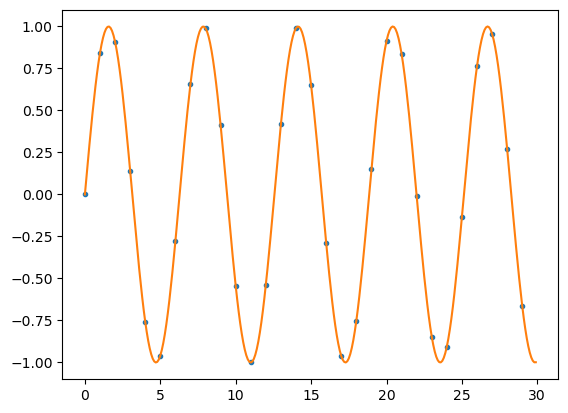

In [179]:
plt.plot(test_signal_x,test_signal,".")
plt.plot(full_signal_x,full_signal)

## Interpolate with obspy
Obspy has interpolation with "lanczos" and other methods, for example "cubic" interpolation. For "Lanczos" resampling the "a" parameter has to be given. The "a" parameter gives the range of nearby samples and also scales the Lanczos kernel size. The actual values are calculated by convolution of the kernel with the samples. So that values further away from the nearby value go into the sum calculation weighted by the Lanczos kernel.

In [188]:
## cubic example
obspy_trace = Trace(test_signal)
obspy_trace.interpolate(10, method="cubic")
data_interpolated_cubic = obspy_trace.data.copy()

## lanczos example
obspy_trace = Trace(test_signal)
obspy_trace.interpolate(10, method="lanczos", a=3)
data_interpolated_lanczos = obspy_trace.data.copy()

In [191]:
# x_interpolated = np.linspace(0,9.1, 91)

x_interpolated = full_signal_x[:291]
full_signal_compared = full_signal[:291]

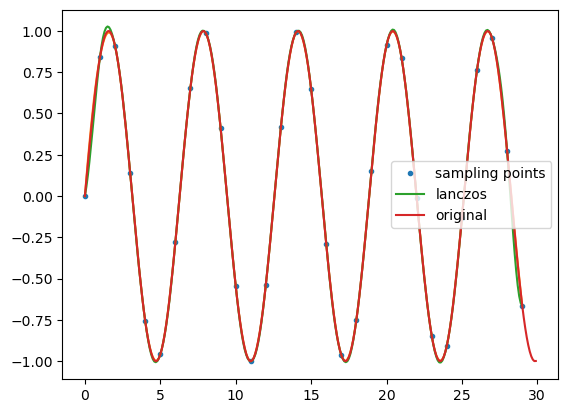

<Figure size 1200x1200 with 0 Axes>

In [192]:
plt.plot(test_signal_x,test_signal,".", label="sampling points")

plt.plot(x_interpolated, data_interpolated_cubic)
plt.plot(x_interpolated, data_interpolated_lanczos, label="lanczos")
plt.plot(full_signal_x,full_signal,label="original")
plt.legend()
plt.figure(figsize=(12,12))
plt.show()

In [196]:
error_cubic = (np.abs(full_signal_compared-data_interpolated_cubic)).mean()
error_lanczos = (np.abs(full_signal_compared-data_interpolated_lanczos)).mean()

print(f"The cubic interpolation has error = {error_cubic}")
print(f"The lanczos interpolation has error = {error_lanczos}")

The cubic interpolation has error = 0.0020025918170312328
The lanczos interpolation has error = 0.008860611342768616


# Discussion
The a parameter has a huge influence here because there are only 10 samples. Higher a then does not lead to more accurate results in the long run because of the problems associated with padding with zeros at the boundary.

The actual error of the lanczos interpolation is actually also higher than simply choosing the cubic interpolation error.